# Graphs to get insight as to why people are leaving the organization

In [1]:

#Call the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings    # We want to suppress warnings
import os

In [2]:
#Read Data



IBM_hrdata = pd.read_csv('../input/WA_Fn-UseC_-HR-Employee-Attrition.csv')
IBM_hrdata.info()
IBM_hrdata.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#Check the unique columns in the data to find which are categorical


Nunique = IBM_hrdata.nunique()
Nunique = Nunique.sort_values()
Nunique

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

**Data Visulization using Seaborn**
Seaborn is a library for making attractive and informative statistical graphics in Python. It is built on top of matplotlib and tightly integrated with the PyData stack, including support for numpy and pandas data structures and statistical routines from scipy and statsmodels.

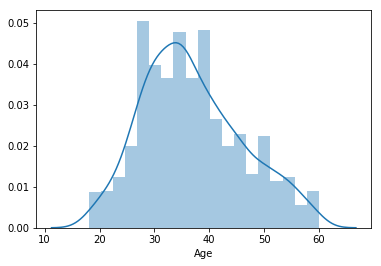

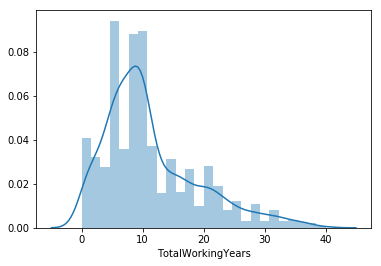

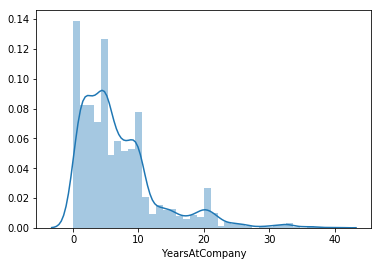

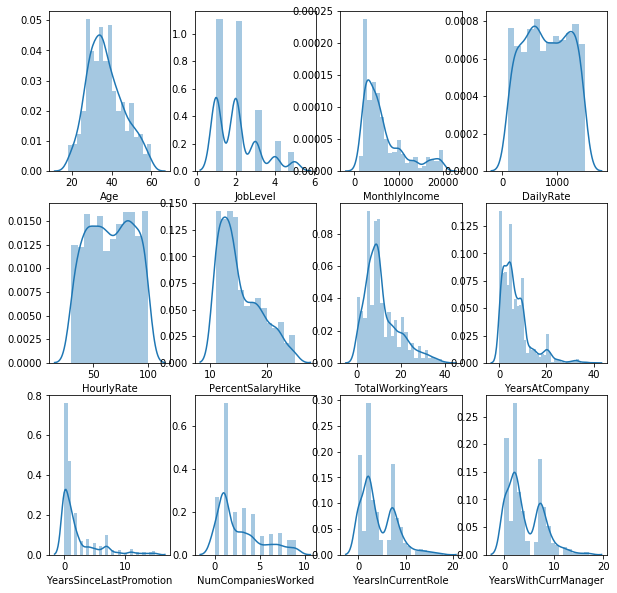

In [4]:

#Distribution Plots for Age, Total Working Years, Years at Company

sns.distplot(IBM_hrdata['Age'])
plt.show() 

sns.distplot(IBM_hrdata['TotalWorkingYears'])
plt.show() 

sns.distplot(IBM_hrdata['YearsAtCompany'])
plt.show() 
#Multiple Distribution Plots 

#Age, Job role, Monthly income, Daily Rate, Hourly Rate, Percentage Saalry Hike, Total Working Years, Years at company, Years since Last promotion, Years with current manager, Number of companies worked, Years in Current Role 



fig, ax = plt.subplots(figsize=(10,10), ncols=4, nrows=3) 
sns.distplot(IBM_hrdata['Age'], ax = ax[0,0]) 
sns.distplot(IBM_hrdata['JobLevel'], ax = ax[0,1]) 
sns.distplot(IBM_hrdata['MonthlyIncome'], ax = ax[0,2]) 
sns.distplot(IBM_hrdata['DailyRate'], ax = ax[0,3]) 
sns.distplot(IBM_hrdata['HourlyRate'], ax = ax[1,0]) 
sns.distplot(IBM_hrdata['PercentSalaryHike'], ax = ax[1,1])
sns.distplot(IBM_hrdata['TotalWorkingYears'], ax = ax[1,2]) 
sns.distplot(IBM_hrdata['YearsAtCompany'], ax = ax[1,3])
sns.distplot(IBM_hrdata['YearsSinceLastPromotion'], ax = ax[2,0]) 
sns.distplot(IBM_hrdata['NumCompaniesWorked'], ax = ax[2,1]) 
sns.distplot(IBM_hrdata['YearsInCurrentRole'], ax = ax[2,2]) 
sns.distplot(IBM_hrdata['YearsWithCurrManager'], ax = ax[2,3]) 
plt.show()

Observation: 
    Majority Employee age group is between 25-40 .
    Total work experience of majority employees is less than 10 which at job level 1,2 & 3.
    Majority employees Years at company is less than 10 

**Count Plot**

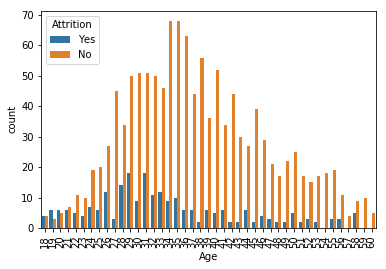

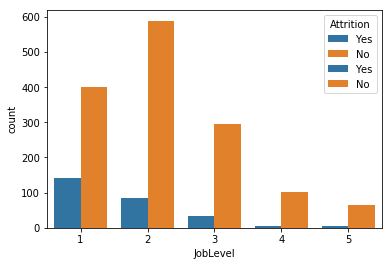

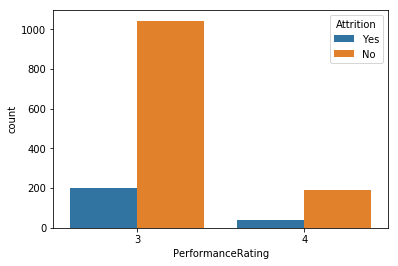

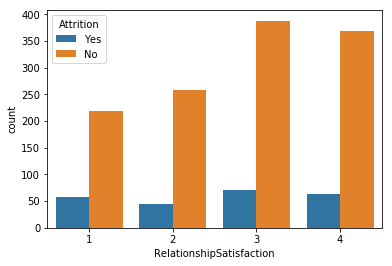

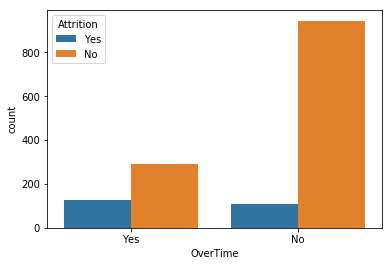

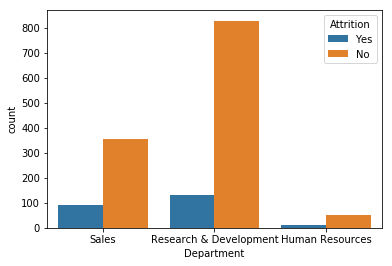

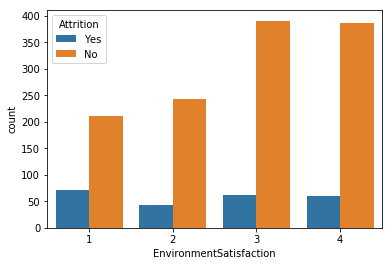

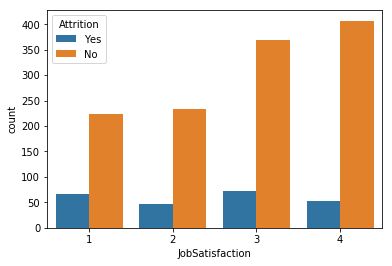

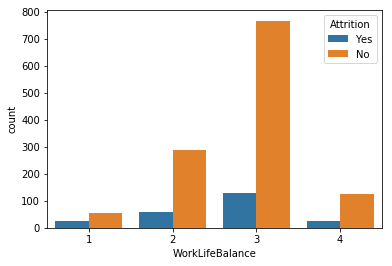

In [5]:
#Count Plot

#Age vs attrition


sns.countplot(x=IBM_hrdata['Age'], hue="Attrition", data=IBM_hrdata) 
plt.xticks( rotation=90)
plt.show()

#Multiple Count plots
#Marital status,Performace rating, Job Level,   Relationship Satisfaction, Over Time, Department, Environmental Satisfaction , job Satisfaction, Work life Balace




# create a data frame to store all required columns

data_df1=pd.DataFrame(IBM_hrdata[['MaritalStatus','PerformanceRating','JobLevel','RelationshipSatisfaction','OverTime','Department','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']])

for i, col in enumerate(data_df1.columns):
	sns.countplot(x=col, hue='Attrition',data=IBM_hrdata)	
	plt.figure(i)



Observation: 
    Attrition rate is more for Job level 1 & 2 and in Reaserch Department.
    Midlevel Age group 25-35 has major attrition rate.
    

**Bar Plot**

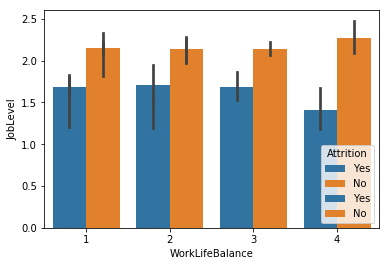

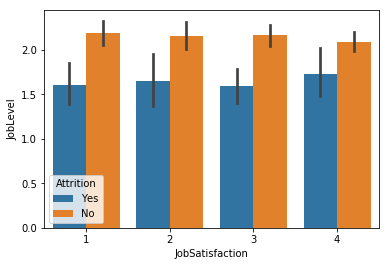

In [6]:
#Multiple bar plots

# create a data frame to store all required columns

data_df2=pd.DataFrame(IBM_hrdata[['PerformanceRating','JobSatisfaction','WorkLifeBalance']])

for i, col in enumerate(data_df2.columns):
    sns.barplot(x=col,y='JobLevel', hue='Attrition',data=IBM_hrdata)
    plt.figure(i)
   



Obsrvation: Work life Balance nad Job satisfaction is not a major influence for attrition

**Box Plot**

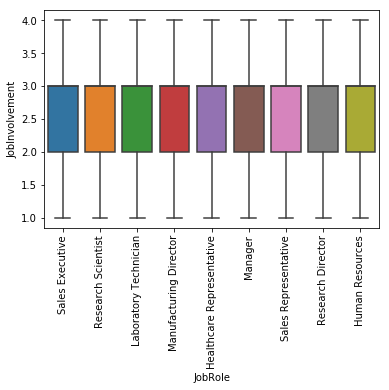

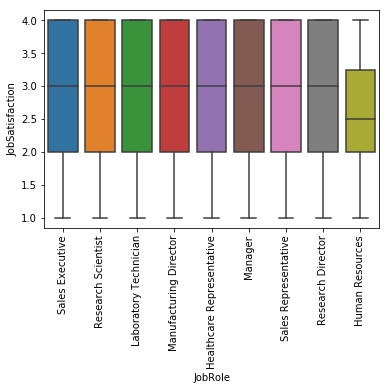

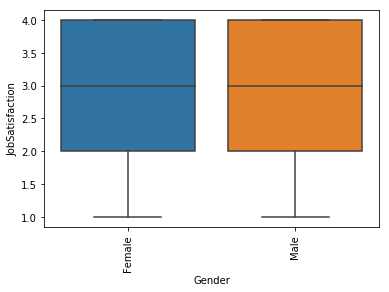

In [7]:

#Box Plot

sns.boxplot(IBM_hrdata['JobRole'], IBM_hrdata['JobInvolvement'])
plt.xticks( rotation=90)
plt.show()
sns.boxplot(IBM_hrdata['JobRole'], IBM_hrdata['JobSatisfaction'])
plt.xticks( rotation=90)
plt.show()
sns.boxplot(IBM_hrdata['Gender'], IBM_hrdata['JobSatisfaction'])
plt.xticks( rotation=90)
plt.show()
#sns.boxplot(IBM_hrdata['Gender'], IBM_hrdata['BusinessTravel'])
#plt.show()
#sns.boxplot(IBM_hrdata['Joblevel'], IBM_hrdata['BusinessTravel'])
#plt.show()


Observation: 
    Human resources team has less Job satisfaction compared to other departments

**Swarm Plot**

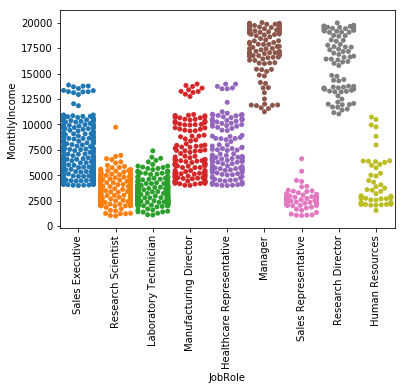

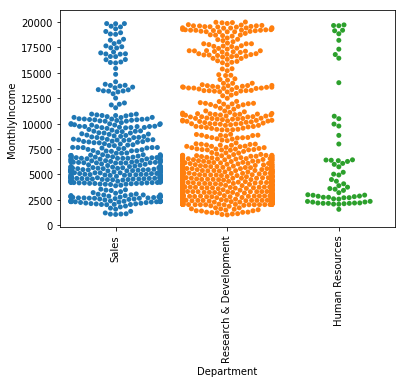

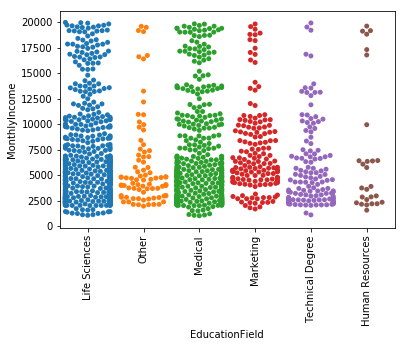

In [8]:

#Swarm Plot

sns.swarmplot(IBM_hrdata['JobRole'],IBM_hrdata['MonthlyIncome'])
plt.xticks( rotation=90)
plt.show()
sns.swarmplot(IBM_hrdata['Department'],IBM_hrdata['MonthlyIncome'])
plt.xticks( rotation=90)
plt.show()
sns.swarmplot(IBM_hrdata['EducationField'],IBM_hrdata['MonthlyIncome'])
plt.xticks( rotation=90)
plt.show()

**Joint Plots**

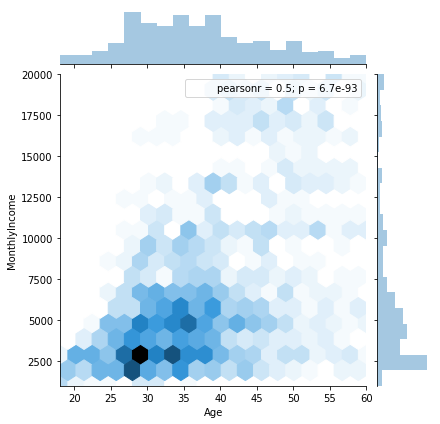

In [9]:
# joint Plots
sns.jointplot(IBM_hrdata.Age,IBM_hrdata.MonthlyIncome, kind = "hex")   
plt.show()

**Pair Plots**

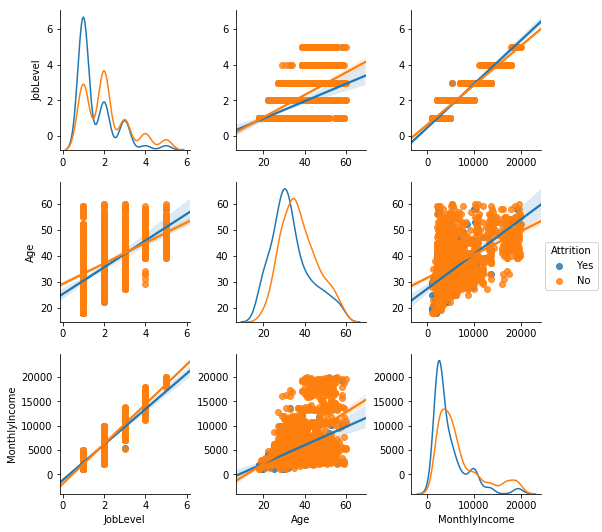

In [10]:
#Pair Plots
cont_col= ['Attrition','JobLevel','Age','EducationField','MonthlyIncome']
sns.pairplot(IBM_hrdata[cont_col],  kind="reg", diag_kind = "kde"  , hue = 'Attrition' )
plt.show()

**Factor Plots**

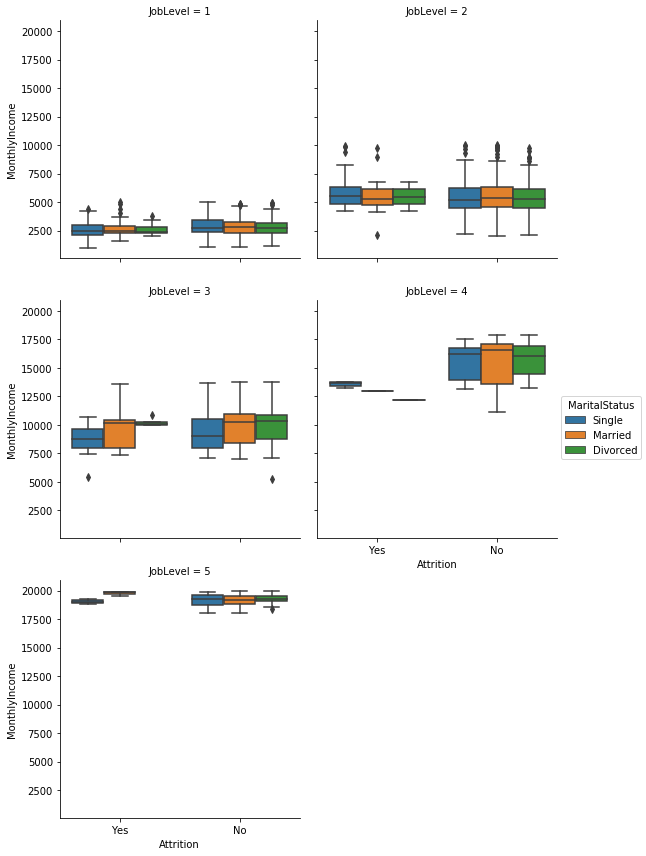

In [11]:
#Factor plots
sns.factorplot(x =   'Attrition',
               y =   'MonthlyIncome',
               hue = 'MaritalStatus',
               col=  'JobLevel',   
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = IBM_hrdata)
plt.show()